In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('/kaggle/input/student-performance-factors/StudentPerformanceFactors.csv')
df.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

In [3]:
df.shape

(6607, 20)

In [4]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [5]:
df.tail()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68
6606,15,67,Medium,Low,Yes,9,94,Medium,Yes,0,Medium,Medium,Public,Positive,4,No,Postgraduate,Near,Male,64


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [7]:
df.describe(include = "all")

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
count,6607.000000,6607.000000,6607,6607,6607,6607.00000,6607.000000,6607,6607,6607.000000,6607,6529,6607,6607,6607.000000,6607,6517,6540,6607,6607.000000
unique,NaN,NaN,3,3,2,NaN,NaN,3,2,NaN,3,3,2,3,NaN,2,3,3,2,NaN
top,NaN,NaN,Medium,Medium,Yes,NaN,NaN,Medium,Yes,NaN,Low,Medium,Public,Positive,NaN,No,High School,Near,Male,NaN
freq,NaN,NaN,3362,3319,3938,NaN,NaN,3351,6108,NaN,2672,3925,4598,2638,NaN,5912,3223,3884,3814,NaN
mean,19.975329,79.977448,NaN,NaN,NaN,7.02906,75.070531,NaN,NaN,1.493719,NaN,NaN,NaN,NaN,2.967610,NaN,NaN,NaN,NaN,67.235659
std,5.990594,11.547475,NaN,NaN,NaN,1.46812,14.399784,NaN,NaN,1.230570,NaN,NaN,NaN,NaN,1.031231,NaN,NaN,NaN,NaN,3.890456
min,1.000000,60.000000,NaN,NaN,NaN,4.00000,50.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,55.000000
25%,16.000000,70.000000,NaN,NaN,NaN,6.00000,63.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,65.000000
50%,20.000000,80.000000,NaN,NaN,NaN,7.00000,75.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,67.000000
75%,24.000000,90.000000,NaN,NaN,NaN,8.00000,88.000000,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,69.000000


In [8]:
df =  df[(df['Exam_Score'] < 101)]
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6606.000000,6606.000000,6606.000000,6606.000000,6606.000000,6606.000000,6606.000000
mean,19.974266,79.974720,7.029216,75.067817,1.493188,2.967605,67.230548
std,5.990424,11.546219,1.468177,14.399184,1.229907,1.031309,3.868502
min,1.000000,60.000000,4.000000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.000000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.000000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.000000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.000000,100.000000,8.000000,6.000000,100.000000


In [9]:
df.columns[df.isnull().any()]

Index(['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home'], dtype='object')

In [10]:
df['Teacher_Quality'].fillna(df['Teacher_Quality'].mode()[0], inplace = True)
df['Parental_Education_Level'].fillna(df['Parental_Education_Level'].mode()[0], inplace = True)
df['Distance_from_Home'].fillna(df['Distance_from_Home'].mode()[0], inplace = True)

In [11]:
categorical_columns = [col for col in df.columns if df[col].dtype == 'object']

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6606 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6606 non-null   int64 
 1   Attendance                  6606 non-null   int64 
 2   Parental_Involvement        6606 non-null   object
 3   Access_to_Resources         6606 non-null   object
 4   Extracurricular_Activities  6606 non-null   object
 5   Sleep_Hours                 6606 non-null   int64 
 6   Previous_Scores             6606 non-null   int64 
 7   Motivation_Level            6606 non-null   object
 8   Internet_Access             6606 non-null   object
 9   Tutoring_Sessions           6606 non-null   int64 
 10  Family_Income               6606 non-null   object
 11  Teacher_Quality             6606 non-null   object
 12  School_Type                 6606 non-null   object
 13  Peer_Influence              6606 non-null   object
 1

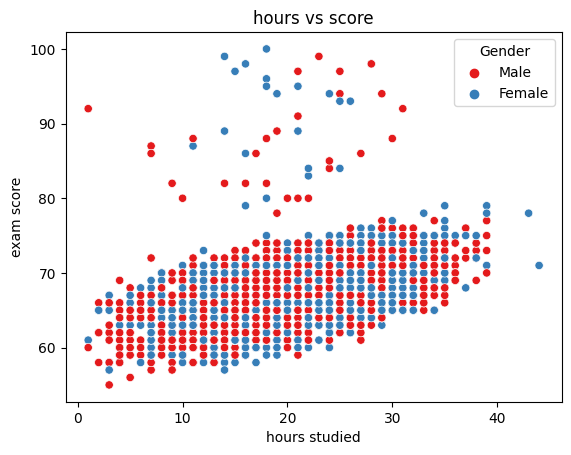

In [13]:
sns.scatterplot(x =df['Hours_Studied'], y = df['Exam_Score'], hue = df['Gender'], palette = 'Set1')
plt.title("hours vs score")
plt.xlabel("hours studied")
plt.ylabel("exam score")
plt.show()

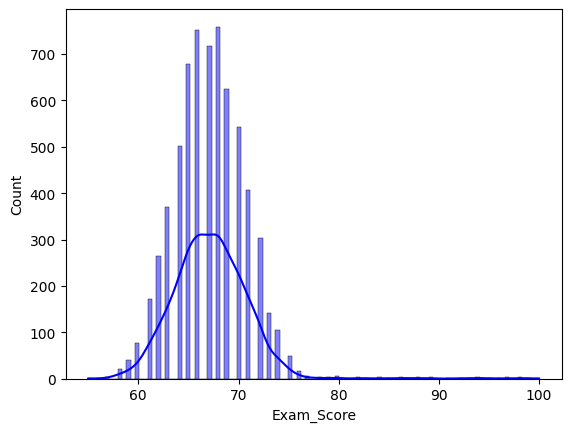

In [14]:
sns.histplot(df['Exam_Score'],kde =True, color = 'blue')
plt.show()

In [15]:
numerical = df.select_dtypes(include = ['float64','int64'])

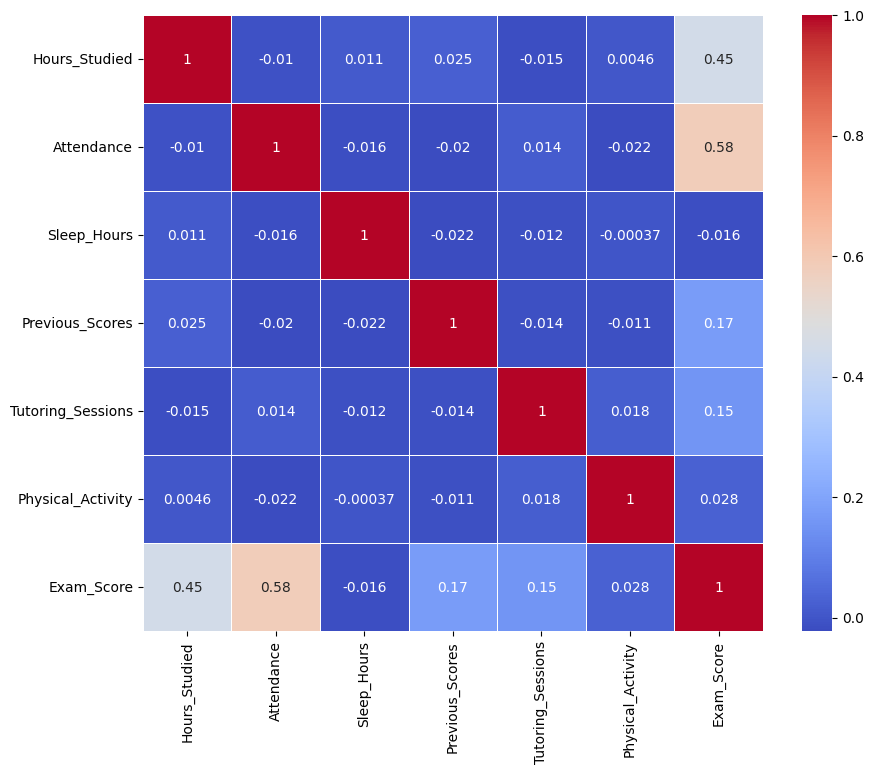

In [16]:
plt.figure(figsize = (10,8))
sns.heatmap(numerical.corr(),cmap = 'coolwarm',annot = True, linewidths = 0.5)
plt.show()

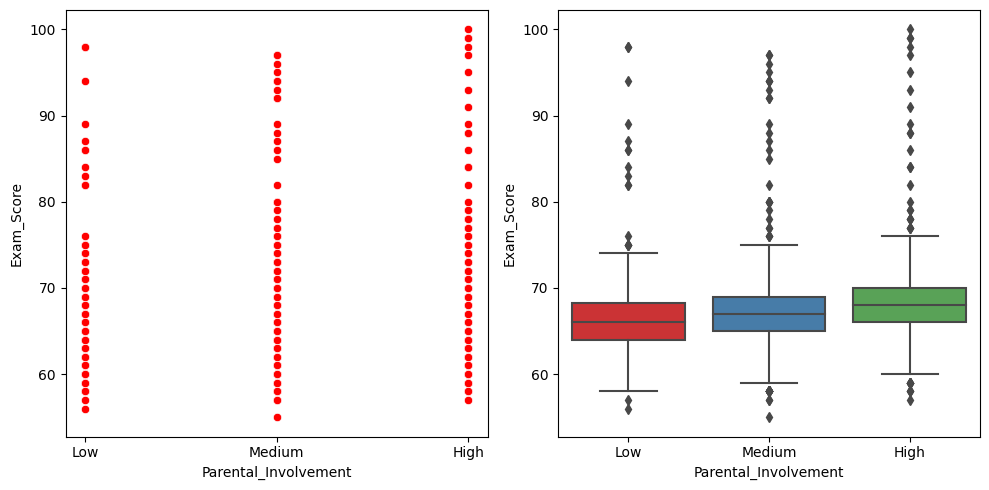

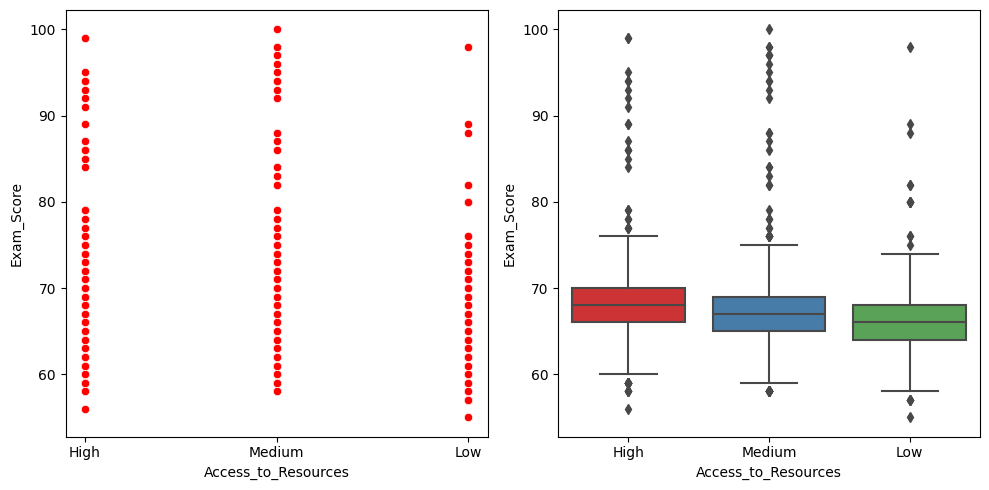

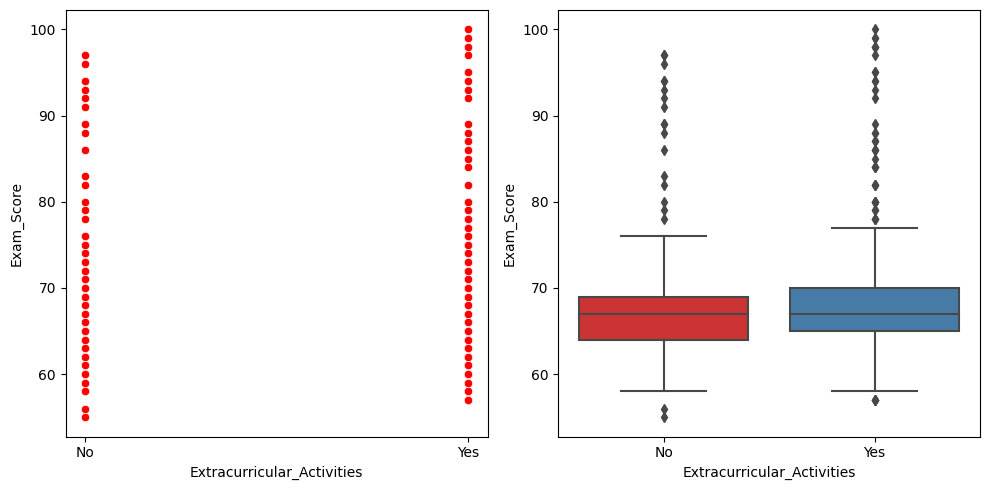

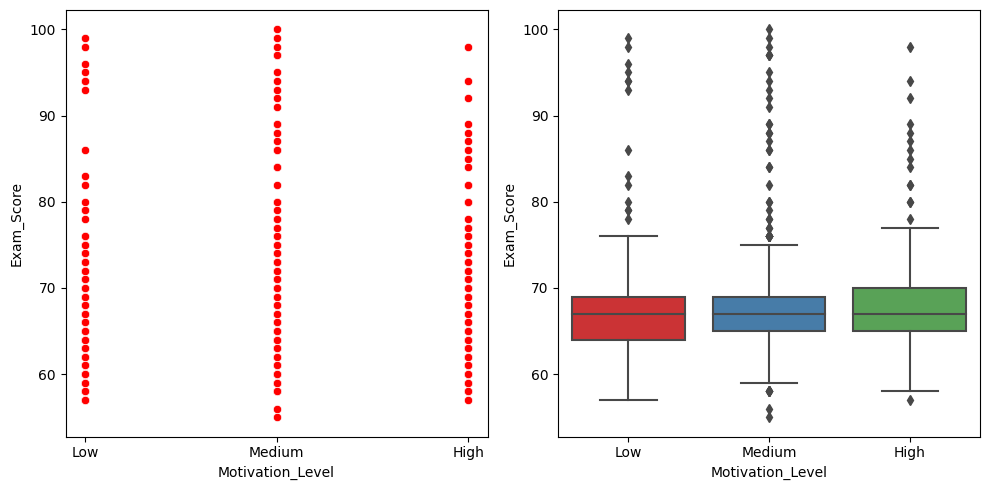

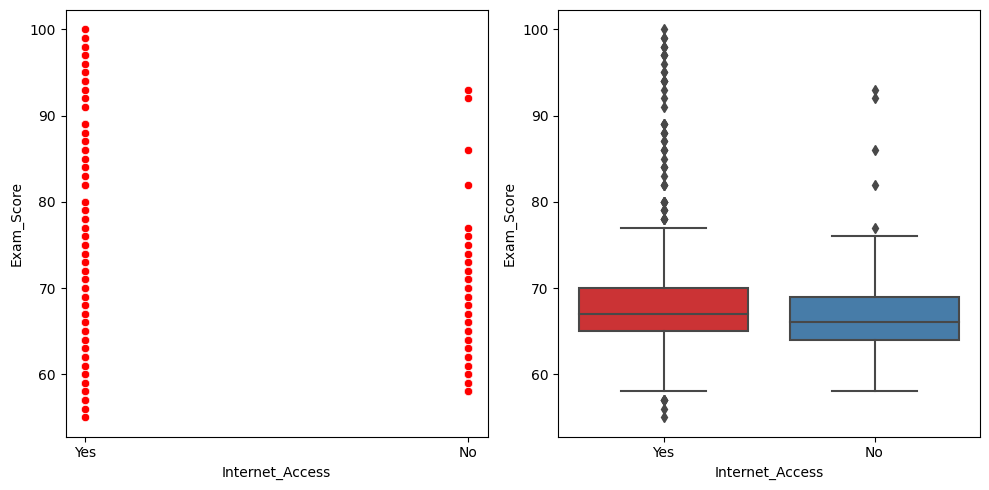

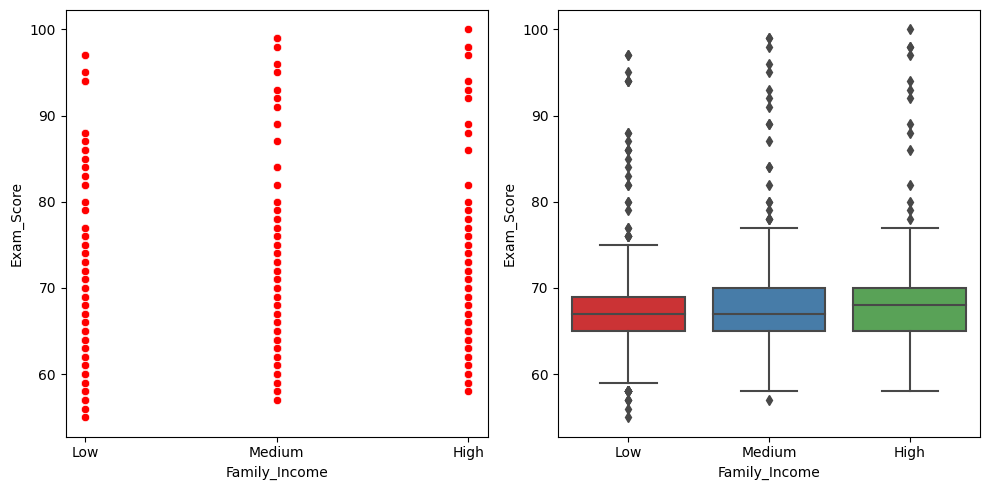

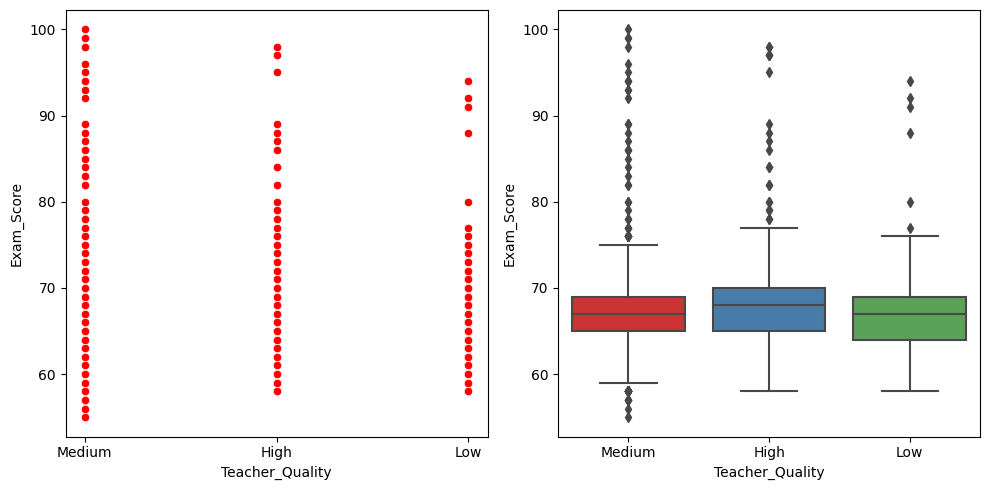

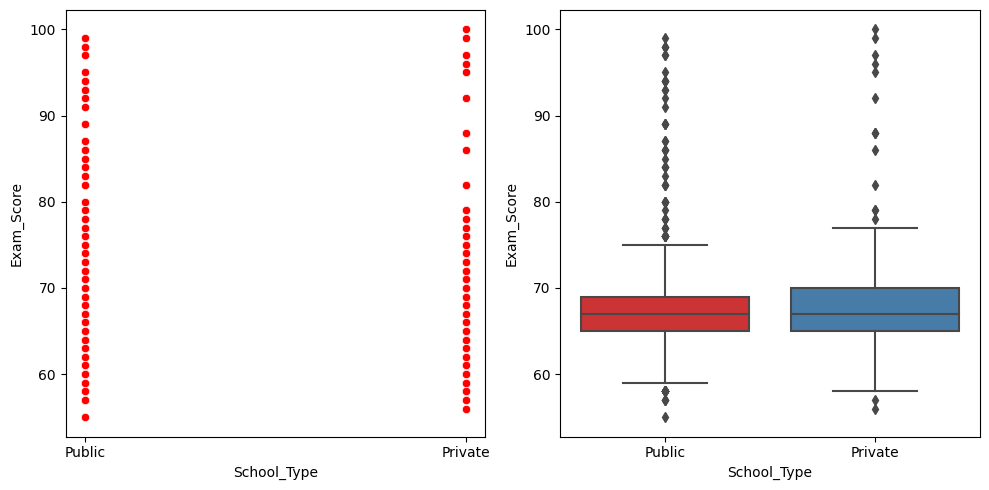

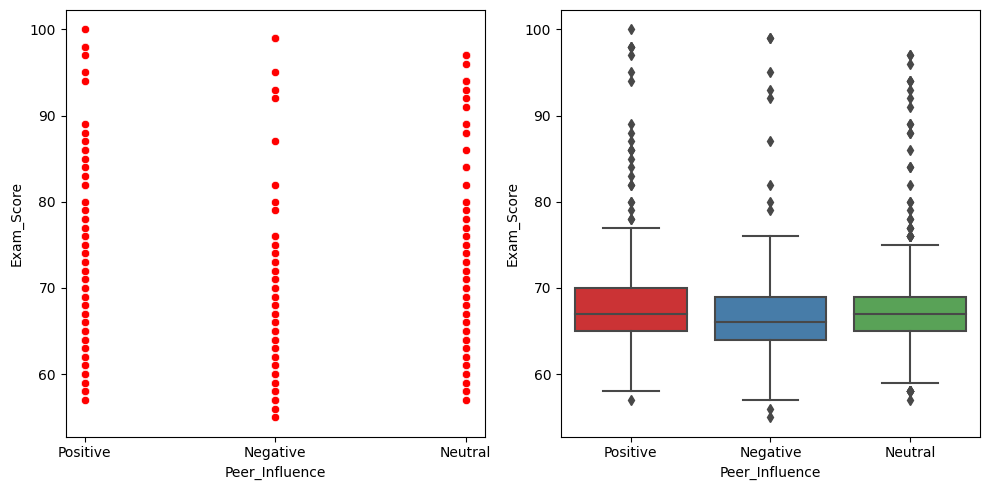

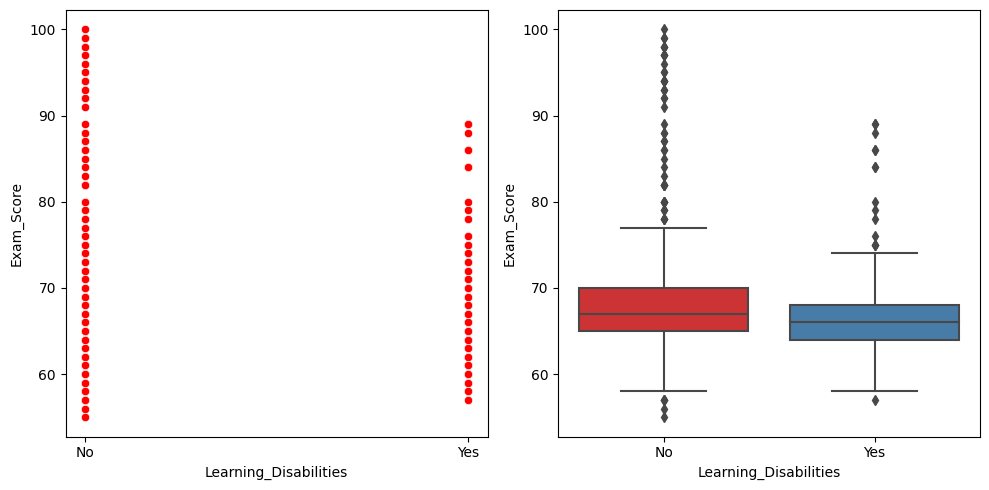

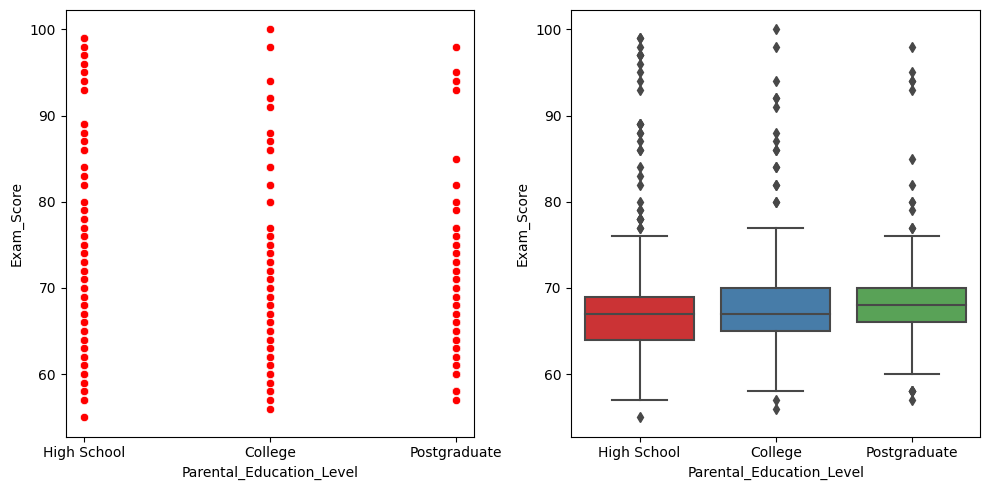

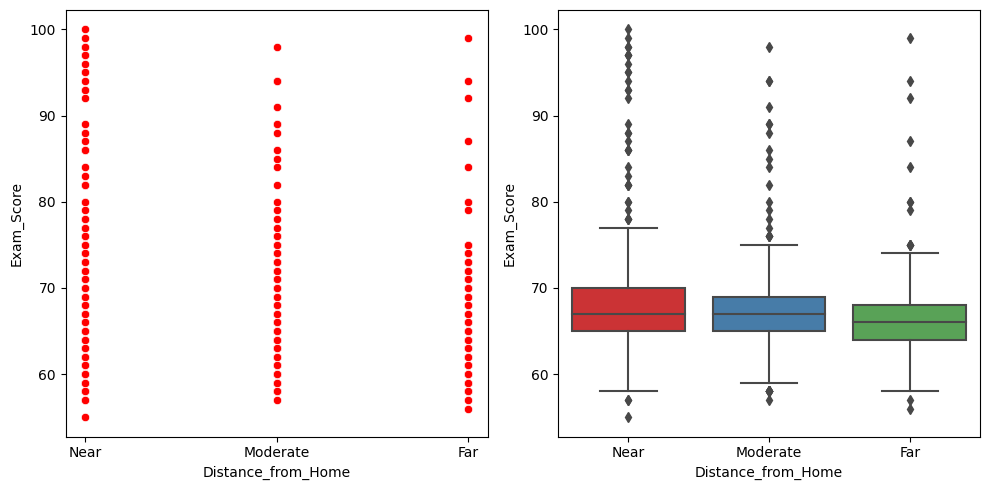

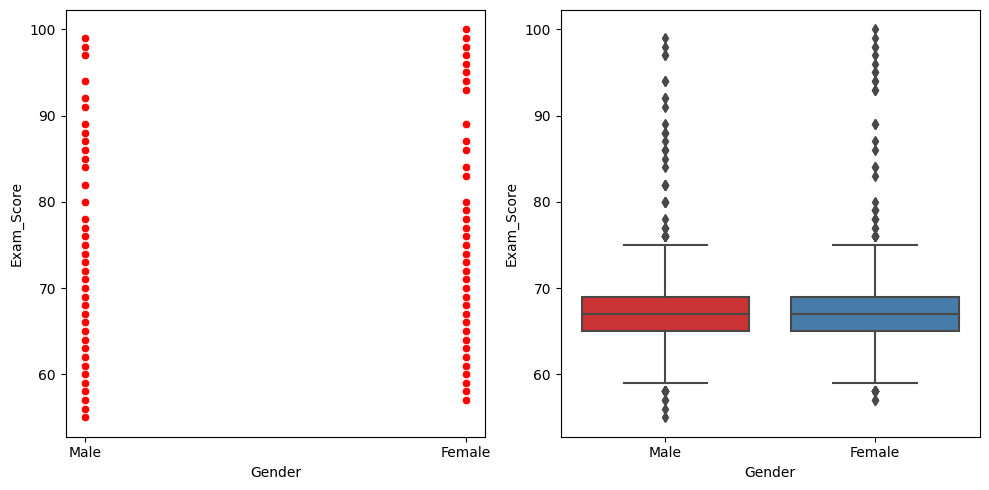

In [17]:
for i in range(len(categorical_columns)):
    plt.figure(figsize = (10,5))
    plt.subplot(1,2,1)
    sns.scatterplot(x = df[categorical_columns[i]] , y = df['Exam_Score'], color = 'red')
    plt.tight_layout()
    plt.subplot(1,2,2)
    sns.boxplot(x = df[categorical_columns[i]] , y = df['Exam_Score'], palette = 'Set1')
    plt.tight_layout()
    plt.show()

In [18]:
df = pd.get_dummies(df,columns =categorical_columns, drop_first = True)

In [19]:
df.head()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score,Parental_Involvement_Low,Parental_Involvement_Medium,Access_to_Resources_Low,...,Teacher_Quality_Medium,School_Type_Public,Peer_Influence_Neutral,Peer_Influence_Positive,Learning_Disabilities_Yes,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate,Distance_from_Home_Moderate,Distance_from_Home_Near,Gender_Male
0,23,84,7,73,0,3,67,True,False,False,...,True,True,False,True,False,True,False,False,True,True
1,19,64,8,59,2,4,61,True,False,False,...,True,True,False,False,False,False,False,True,False,False
2,24,98,7,91,2,4,74,False,True,False,...,True,True,True,False,False,False,True,False,True,True
3,29,89,8,98,1,4,71,True,False,False,...,True,True,False,False,False,True,False,True,False,True
4,19,92,6,65,3,4,70,False,True,False,...,False,True,True,False,False,False,False,False,True,False


In [20]:
X = df.drop('Exam_Score', axis = 1)
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6606 entries, 0 to 6606
Data columns (total 27 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   Hours_Studied                          6606 non-null   int64
 1   Attendance                             6606 non-null   int64
 2   Sleep_Hours                            6606 non-null   int64
 3   Previous_Scores                        6606 non-null   int64
 4   Tutoring_Sessions                      6606 non-null   int64
 5   Physical_Activity                      6606 non-null   int64
 6   Parental_Involvement_Low               6606 non-null   bool 
 7   Parental_Involvement_Medium            6606 non-null   bool 
 8   Access_to_Resources_Low                6606 non-null   bool 
 9   Access_to_Resources_Medium             6606 non-null   bool 
 10  Extracurricular_Activities_Yes         6606 non-null   bool 
 11  Motivation_Level_Low               

In [21]:
X.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity
count,6606.000000,6606.000000,6606.000000,6606.000000,6606.000000,6606.000000
mean,19.974266,79.974720,7.029216,75.067817,1.493188,2.967605
std,5.990424,11.546219,1.468177,14.399184,1.229907,1.031309
min,1.000000,60.000000,4.000000,50.000000,0.000000,0.000000
25%,16.000000,70.000000,6.000000,63.000000,1.000000,2.000000
50%,20.000000,80.000000,7.000000,75.000000,1.000000,3.000000
75%,24.000000,90.000000,8.000000,88.000000,2.000000,4.000000
max,44.000000,100.000000,10.000000,100.000000,8.000000,6.000000


In [22]:
X.head()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Parental_Involvement_Low,Parental_Involvement_Medium,Access_to_Resources_Low,Access_to_Resources_Medium,...,Teacher_Quality_Medium,School_Type_Public,Peer_Influence_Neutral,Peer_Influence_Positive,Learning_Disabilities_Yes,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate,Distance_from_Home_Moderate,Distance_from_Home_Near,Gender_Male
0,23,84,7,73,0,3,True,False,False,False,...,True,True,False,True,False,True,False,False,True,True
1,19,64,8,59,2,4,True,False,False,True,...,True,True,False,False,False,False,False,True,False,False
2,24,98,7,91,2,4,False,True,False,True,...,True,True,True,False,False,False,True,False,True,True
3,29,89,8,98,1,4,True,False,False,True,...,True,True,False,False,False,True,False,True,False,True
4,19,92,6,65,3,4,False,True,False,True,...,False,True,True,False,False,False,False,False,True,False


In [23]:
y = df['Exam_Score']
y.info()

<class 'pandas.core.series.Series'>
Index: 6606 entries, 0 to 6606
Series name: Exam_Score
Non-Null Count  Dtype
--------------  -----
6606 non-null   int64
dtypes: int64(1)
memory usage: 103.2 KB


In [24]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2 , random_state =42)

In [25]:
prep = MinMaxScaler()
x_train_scaled = prep.fit_transform(x_train)
x_test_scaled = prep.transform(x_test)

In [26]:
lr = LinearRegression()
lr.fit(x_train_scaled, y_train)

LinearRegression()

In [27]:
y_predict = lr.predict(x_test_scaled)

In [28]:
print(f"train score : {lr.score(x_train_scaled,y_train)}")
print(f"test score : {lr.score(x_test_scaled,y_test)}")

train score : 0.7109787258188146
test score : 0.8249999018449947


In [29]:
lr_score = lr.score(x_test_scaled,y_test)
lr_score

0.8249999018449947

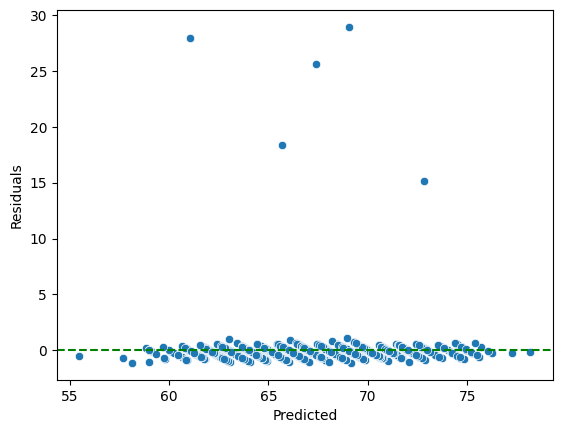

In [30]:
sns.scatterplot(x =y_predict, y =  y_test- y_predict)
plt.axhline(0,color = 'green', linestyle = "--")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

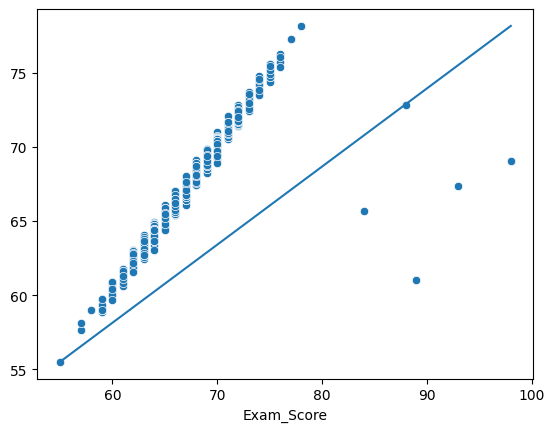

In [76]:
sns.scatterplot(x = y_test,y = y_predict)
plt.plot([min(y_test),max(y_test)],[min(y_predict),max(y_predict)])
plt.show()

In [50]:
linfold = KFold(n_splits = 5, shuffle = True)
x_scaled = prep.fit_transform(X)
linscores = cross_val_score(lr,x_scaled,y, cv = linfold)
linear_score = scores.mean()

In [53]:
print("Cross Validation Scores: ", linscores)
print("Average CV Score: ", linear_score)

Cross Validation Scores:  [0.79044959 0.71783128 0.66008464 0.70481397 0.78255822]
Average CV Score:  0.7334865677797502


In [54]:
ridge = Ridge()
ridge.fit(x_train_scaled, y_train)

Ridge()

In [55]:
y_predict2 = ridge.predict(x_test_scaled)

In [56]:
mean_squared_error(y_test,y_predict2)

2.3169562732555353

In [57]:
r2_score(y_test,y_predict2)

0.8247944722387893

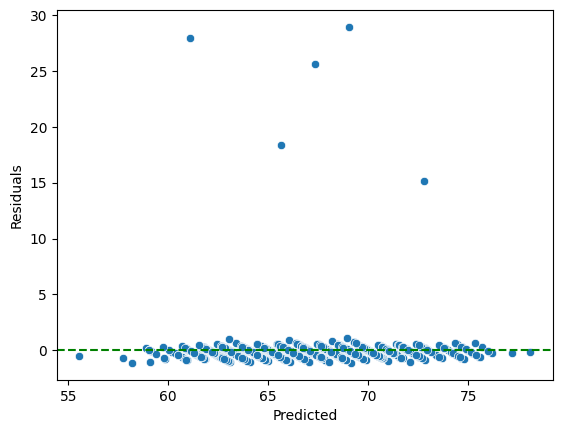

In [69]:
sns.scatterplot(x =y_predict2, y =  y_test- y_predict)
plt.axhline(0,color = 'green', linestyle = "--")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

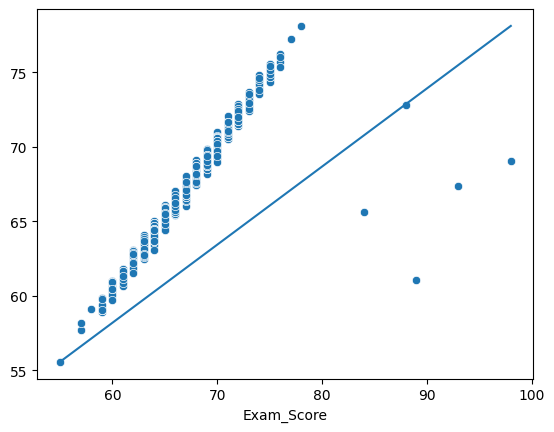

In [77]:
sns.scatterplot(x = y_test,y = y_predict2)
plt.plot([min(y_test),max(y_test)],[min(y_predict2),max(y_predict2)])
plt.show()

In [58]:
ridge.score(x_train_scaled,y_train)

0.7109557314274167

In [60]:
ridgefold = KFold(n_splits = 5, shuffle = True)
ridgescores = cross_val_score(lr,x_scaled,y, cv = ridgefold)

In [61]:
ridge_score = ridgescores.mean()

In [63]:
poly_reg = Pipeline([
    ('poly_features', PolynomialFeatures(degree=2, include_bias=False)),
    ('lin_reg', LinearRegression())
])

In [64]:
kfold_poly = KFold(n_splits = 5, shuffle = True, random_state = 42)
poly_scores = cross_val_score(poly_reg,x_scaled,y, cv = kfold_poly)
poly_scores

array([0.79956478, 0.75025311, 0.72568688, 0.60350787, 0.67244071])

In [65]:
poly_score = poly_scores.mean()

In [66]:
poly_score

0.7102906701127141

In [67]:
names = ["linear","ridge","polynomial"]
acc = [linear_score,ridge_score,poly_score]

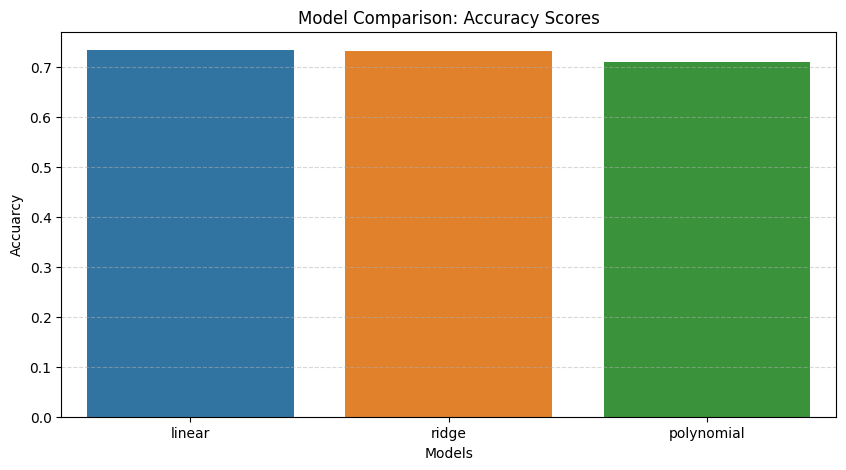

In [68]:
plt.figure(figsize = (10,5))
sns.barplot(x = names , y = acc)
plt.title('Model Comparison: Accuracy Scores')
plt.xlabel('Models')
plt.ylabel("Accuarcy")
plt.grid(axis = "y",linestyle = "--",alpha = 0.5)
plt.show()

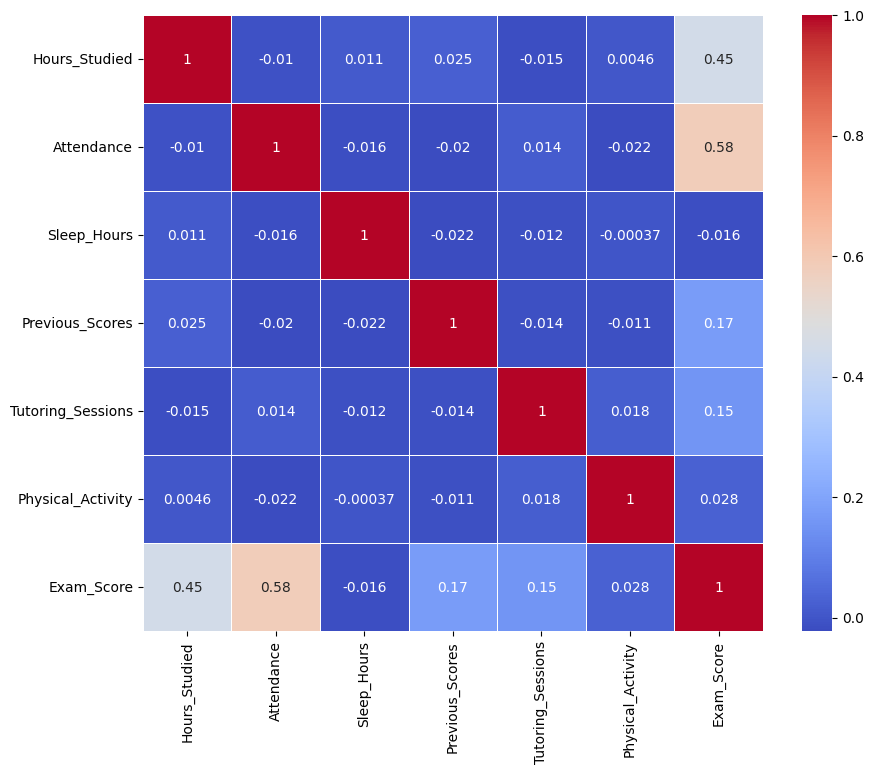

In [85]:
plt.figure(figsize = (10,8))
sns.heatmap(numerical.corr(),cmap = 'coolwarm',annot = True, linewidths = 0.5)
plt.show()

# Now trying to remove unnecessary columns

In [171]:
new_X = df.drop(['Physical_Activity','Sleep_Hours','Exam_Score'], axis = 1)

In [172]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(new_X,y, test_size = 0.2 , random_state =42)

In [173]:
x_train2_scaled= prep.fit_transform(x_train2)
x_test2_scaled = prep.transform(x_test2)

In [174]:
lr2 = LinearRegression()

In [175]:
lr2.fit(x_train2_scaled,y_train2)

LinearRegression()

In [176]:
y_predict2 = lr2.predict(x_test2_scaled)

In [177]:
lr2.score(x_test2_scaled,y_test2)

0.8205562403630816

In [178]:
mean_squared_error(y_test2,y_predict2)

2.3730035798525972

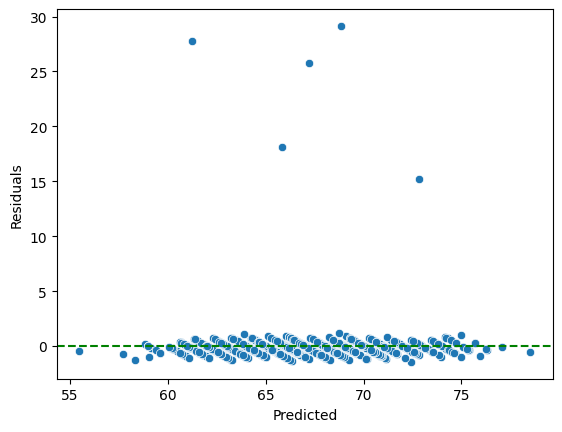

In [181]:
sns.scatterplot(x =y_predict2, y =  y_test2- y_predict2)
plt.axhline(0,color = 'green', linestyle = "--")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

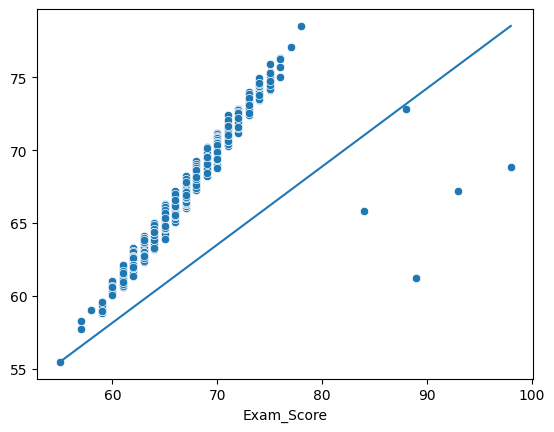

In [182]:
sns.scatterplot(x = y_test2,y = y_predict2)
plt.plot([min(y_test2),max(y_test2)],[min(y_predict2),max(y_predict2)])
plt.show()

In [179]:
linfold2 = KFold(n_splits = 5, shuffle = True)
x_scaled2 = prep.fit_transform(new_X)
linscores2 = cross_val_score(lr2,x_scaled2,y, cv = linfold2)
linear_score2 = linscores2.mean()

In [183]:
print("Cross Validation Scores after second attempt: ", linscores2)
print("Average CV Score after second attempt: ", linear_score2)

Cross Validation Scores after second attempt:  [0.73575245 0.81411203 0.64012422 0.76803376 0.69546214]
Average CV Score after second attempt:  0.7306969220682192
